In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import cv2
from tqdm import tqdm
import os
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = keras.models.load_model('./model/model.05-3.42.h5')


In [3]:
n_channels = 3

In [32]:
def get_image(img):
    img = plt.imread(img)
    X = np.reshape(img, (img.shape[0], img.shape[1], n_channels))

    return X

In [60]:
# cargar datos de prueba
chihuahua = './data/Images/n02085620-Chihuahua'
spaniel = './data/Images/n02085782-Japanese_spaniel'
maltese = './data/Images/n02085936-Maltese_dog'
papillon = './data/Images/n02086910-papillon'

X = []
images_path = []

for perrito in [chihuahua, spaniel, maltese, papillon]:
    for idx, file in enumerate(os.listdir(perrito)):
        img_path = os.path.join(perrito, file)
        img = get_image(img_path)
        images_path.append(img_path)
        img = cv2.resize(img, dsize=(150, 150), dst=None, interpolation=cv2.INTER_AREA)
#         plt.imshow(img)
        img = np.reshape(img, (1, img.shape[0], img.shape[1], n_channels)).astype(np.float32) / 255
#         plt.title(perrito.split('-')[-1])
#         plt.axis('off')
#         plt.show()
        X.append(model.predict(img)[0])
        if idx == 100: break
#         break

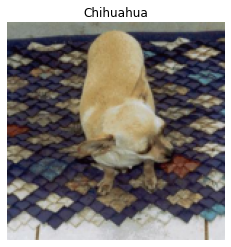

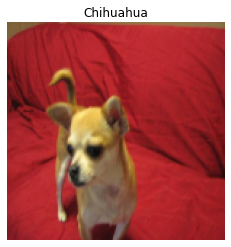

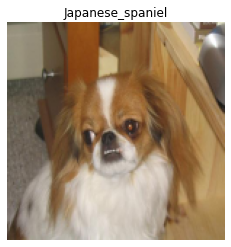

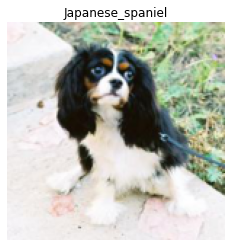

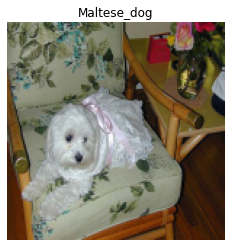

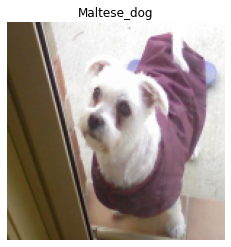

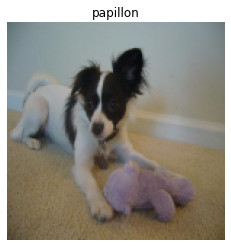

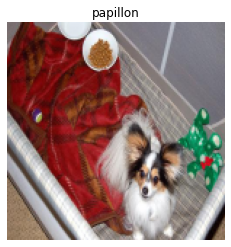

In [61]:
Y = []
y_imagesPath = []
for perrito in [chihuahua, spaniel, maltese, papillon]:
    for idx, file in enumerate(os.listdir(perrito)):
        if idx <= 100: continue
        elif idx == 103: break

        img_path = os.path.join(perrito, file)
        img = get_image(img_path)
        y_imagesPath.append(img_path)
        img = cv2.resize(img, dsize=(150, 150), dst=None, interpolation=cv2.INTER_AREA)
        plt.imshow(img)
        img = np.reshape(img, (1, img.shape[0], img.shape[1], n_channels)).astype(np.float32) / 255
        plt.title(perrito.split('-')[-1])
        plt.axis('off')
        plt.show()
        Y.append(model.predict(img)[0])


Buscamos al perrito Chihuahua n02085620_8611.jpg


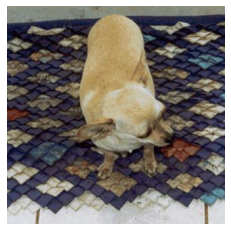

Mas parecidos son:


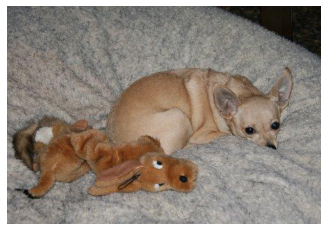

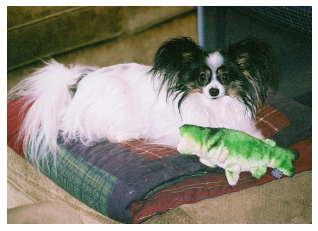


Buscamos al perrito Chihuahua n02085620_4673.jpg


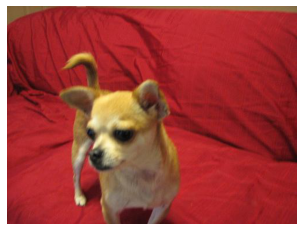

Mas parecidos son:


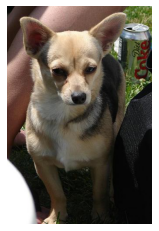

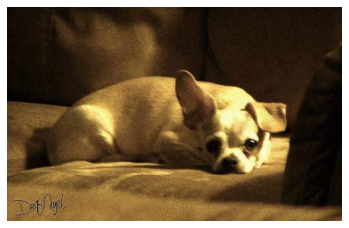


Buscamos al perrito Japanese_spaniel n02085782_664.jpg


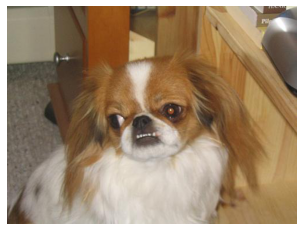

Mas parecidos son:


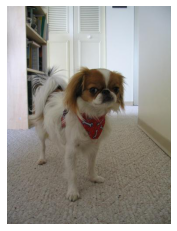

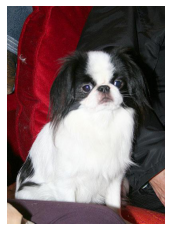


Buscamos al perrito Japanese_spaniel n02085782_4438.jpg


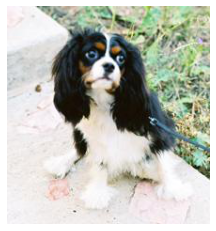

Mas parecidos son:


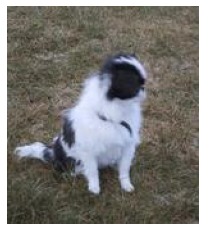

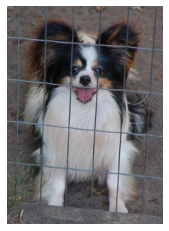


Buscamos al perrito Maltese_dog n02085936_2741.jpg


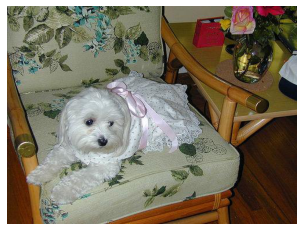

Mas parecidos son:


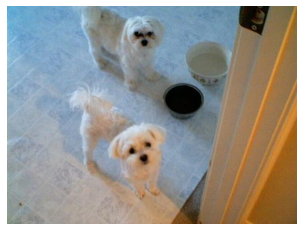

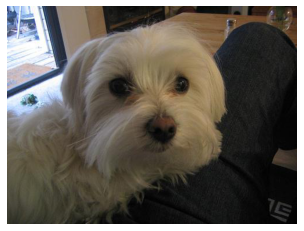


Buscamos al perrito Maltese_dog n02085936_5789.jpg


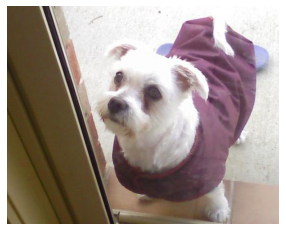

Mas parecidos son:


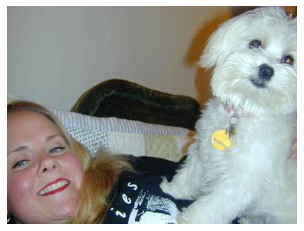

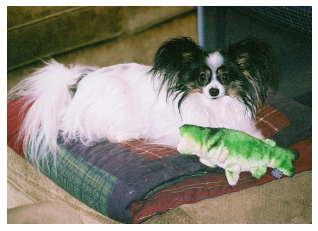


Buscamos al perrito papillon n02086910_3140.jpg


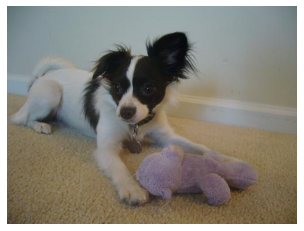

Mas parecidos son:


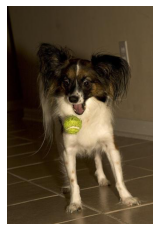

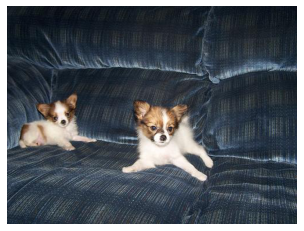


Buscamos al perrito papillon n02086910_2335.jpg


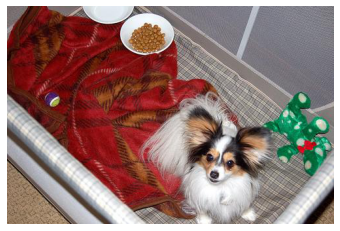

Mas parecidos son:


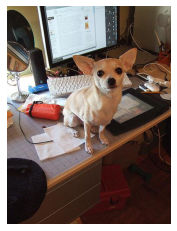

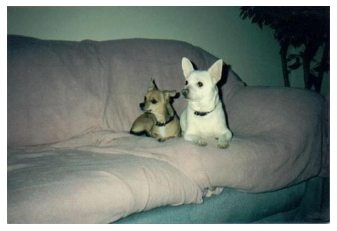

In [70]:

for jdx, y in enumerate(Y):
    y = np.array(y)
    print()
    print('Buscamos al perrito {} {}'.format(y_imagesPath[jdx].split('/')[-2].split('-')[-1],
                                             y_imagesPath[jdx].split('/')[-1]))
    mas_similar = []
    dist_mas_similar = 10
    
    img = get_image(y_imagesPath[jdx])
    plt.imshow(img)
#     plt.title(y_imagesPath[jdx])
    plt.axis('off')
    plt.show()
    
    for idx, x in enumerate(X):
        x = np.array(x)
        dist = np.linalg.norm(x-y)
        if dist < dist_mas_similar:
            dist_mas_similar = dist
            mas_similar.append(idx)
    
    print('Mas parecidos son:')
    for sim in mas_similar[-2:]:
        img = get_image(images_path[sim])
        plt.imshow(img)
        plt.axis('off')
#         print(images_path[sim])
        plt.show()